In [ ]:
import json

with open("train.json", "r") as f:
    data = json.load(f)

print(len(data), "recipes loaded")
print(data[0])


39774 recipes loaded
{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}


In [ ]:
ingredients = set()
for recipe in data:
    for ing in recipe["ingredients"]:
        ingredients.add(ing.strip().lower())

ingredients = sorted(list(ingredients))
print(f"Found {len(ingredients)} unique ingredients")


Found 6703 unique ingredients


In [5]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(ingredients, normalize_embeddings=True)


c:\Users\chand\Documents\GitHub\BFH-offenburg-burda\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\chand\Documents\GitHub\BFH-offenburg-burda\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\chand\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
emb_2d = tsne.fit_transform(embeddings)


In [15]:
emb_2d[:,0]

array([-35.419254 , -36.3782   ,  47.711765 , ...,   1.8150175,
        39.01738  ,  38.043514 ], shape=(6703,), dtype=float32)

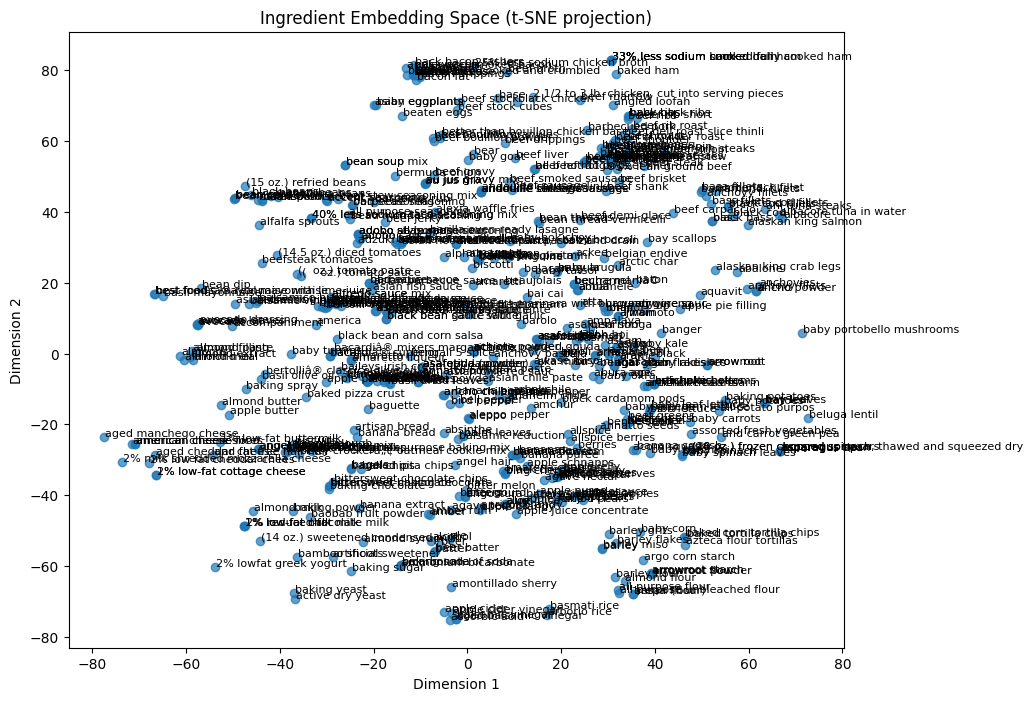

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(emb_2d[:, 0][0:500], emb_2d[:, 1][0:500], alpha=0.7)

for i, label in enumerate(ingredients[0:500]):
    plt.annotate(label, (emb_2d[i, 0] + 0.2, emb_2d[i, 1] + 0.2), fontsize=8)

plt.title("Ingredient Embedding Space (t-SNE projection)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()




